# 필요한 라이브러리 로드

In [2]:
import pandas as pd

In [21]:
df = pd.read_csv('./Churn Modeling.csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [22]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

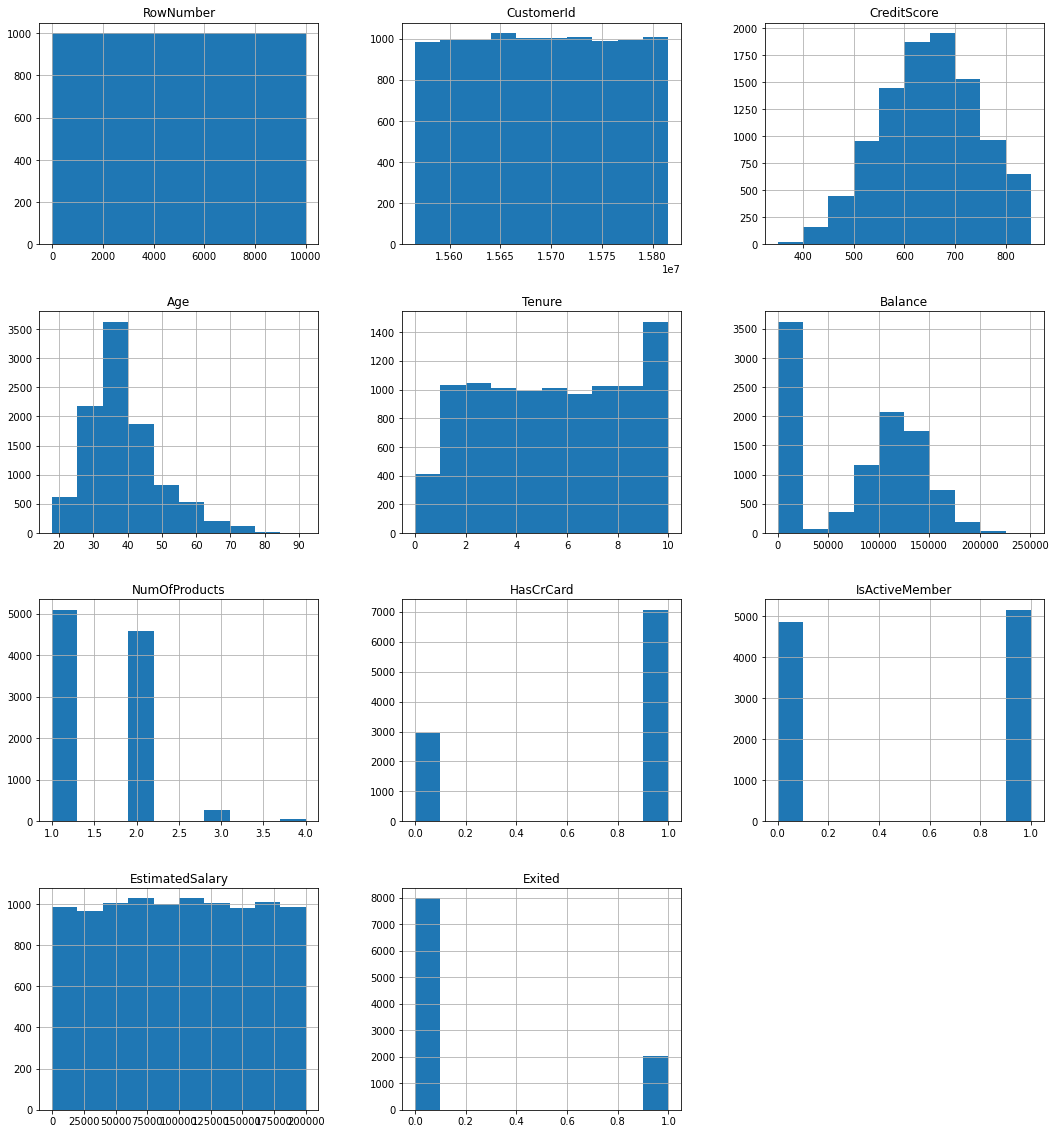

In [23]:
df.hist(figsize=(18,20))

In [24]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [26]:
# Gender -> one hot encoding 으로 전처리 진행 
df = pd.get_dummies(df, columns=['Gender'])

RowNumber  CustomerId    Surname  CreditScore Geography  Age  Tenure  \
0             1    15634602   Hargrave          619    France   42       2   
1             2    15647311       Hill          608     Spain   41       1   
2             3    15619304       Onio          502    France   42       8   
3             4    15701354       Boni          699    France   39       1   
4             5    15737888   Mitchell          850     Spain   43       2   
...         ...         ...        ...          ...       ...  ...     ...   
9995       9996    15606229   Obijiaku          771    France   39       5   
9996       9997    15569892  Johnstone          516    France   35      10   
9997       9998    15584532        Liu          709    France   36       7   
9998       9999    15682355  Sabbatini          772   Germany   42       3   
9999      10000    15628319     Walker          792    France   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  Gender_Female  Gender_Male  
0          1              1            0  
1          0              1            0  
2          1              1            0  
3          0              1            0  
4          0              1            0  
...      ...            ...          ...  
9995       0              0            1  
9996       0              0            1  
9997       1              1            0  
9998       1              0            1  
9999       0              1            0  

[10000 rows x 15 columns]

In [29]:
df = df.drop(columns=['RowNumber'])
df

CustomerId    Surname  CreditScore Geography  Age  Tenure    Balance  \
0       15634602   Hargrave          619    France   42       2       0.00   
1       15647311       Hill          608     Spain   41       1   83807.86   
2       15619304       Onio          502    France   42       8  159660.80   
3       15701354       Boni          699    France   39       1       0.00   
4       15737888   Mitchell          850     Spain   43       2  125510.82   
...          ...        ...          ...       ...  ...     ...        ...   
9995    15606229   Obijiaku          771    France   39       5       0.00   
9996    15569892  Johnstone          516    France   35      10   57369.61   
9997    15584532        Liu          709    France   36       7       0.00   
9998    15682355  Sabbatini          772   Germany   42       3   75075.31   
9999    15628319     Walker          792    France   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Gender_Female  Gender_Male  
0                 1            0  
1                 1            0  
2                 1            0  
3                 1            0  
4                 1            0  
...             ...          ...  
9995              0            1  
9996              0            1  
9997              1            0  
9998              0            1  
9999              1            0  

[10000 rows x 14 columns]

In [38]:
df['Surname'].value_counts()


Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [30]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64